In [ ]:
# !pip install keras tensorflow -U

In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2023-11-01 21:20:46.794174: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 21:20:46.795486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 21:20:46.818150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 21:20:46.818183: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 21:20:46.818199: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [4]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
df.shape

(768, 9)

In [6]:
x = df[:,:8]
y = df[:,8]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
from collections import Counter
Counter(y)

Counter({1.0: 268, 0.0: 500})

In [11]:
import seaborn as sns

In [12]:
# sns.countplot(y)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential([

tf.keras.layers.InputLayer(8,),
Dense(50,activation='relu'),
    
Dense(50,activation='relu'),
Dense(50,activation='relu'),
Dense(50,activation='relu'),
    
Dense(1,activation='sigmoid')
])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8151 (31.84 KB)
Trainable params: 8151 (31.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
history = model.fit(x=x,y=y,epochs=300, batch_size=50,validation_data=(X_val,y_val))

Epoch 1/300
16/16 [==============================] - 1s 9ms/step - loss: 4.6637 - accuracy: 0.3490 - val_loss: 0.6902 - val_accuracy: 0.5065
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 1.6709 - accuracy: 0.3984 - val_loss: 0.6918 - val_accuracy: 0.5325
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 1.0493 - accuracy: 0.5586 - val_loss: 0.6916 - val_accuracy: 0.5325
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 0.7701 - accuracy: 0.5573 - val_loss: 0.6913 - val_accuracy: 0.5065
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.6185 - val_loss: 0.6916 - val_accuracy: 0.5065
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6484 - val_loss: 0.6918 - val_accuracy: 0.5065
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6432 - val_loss: 0.6920 - val_accuracy: 0.5065
Epoch 8/300
1

<AxesSubplot: >

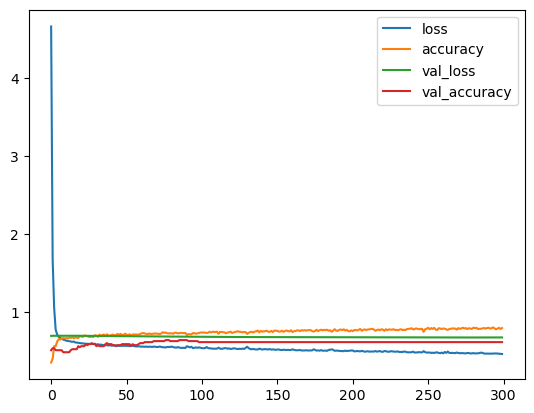

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [19]:
model.evaluate(x,y)

24/24 [==============================] - 0s 827us/step - loss: 0.4548 - accuracy: 0.7956


[0.4547828435897827, 0.7955729365348816]

In [20]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [21]:
y_pred

array([[0.3536893 ],
       [0.31613854],
       [0.33745345],
       [0.31688768],
       [0.35371736],
       [0.297135  ],
       [0.3252551 ],
       [0.27697143],
       [0.30310884],
       [0.33702734],
       [0.34665176],
       [0.3325564 ],
       [0.38049853],
       [0.3818299 ],
       [0.36724174],
       [0.37745008],
       [0.3306878 ],
       [0.3653709 ],
       [0.35571158],
       [0.3112544 ],
       [0.3767397 ],
       [0.33059627],
       [0.34820232],
       [0.36483636],
       [0.34929064],
       [0.2962364 ],
       [0.34757626],
       [0.36365914],
       [0.33992067],
       [0.3360551 ],
       [0.38144177],
       [0.3136258 ],
       [0.37043902],
       [0.3467628 ],
       [0.33579922],
       [0.30091265],
       [0.32302988],
       [0.37102884],
       [0.36642542],
       [0.35825375],
       [0.31936607],
       [0.35450602],
       [0.31473565],
       [0.36615613],
       [0.3369754 ],
       [0.37178075],
       [0.342811  ],
       [0.363

In [22]:
# !pip install ann_visualizer

In [23]:
# !pip install graphviz

In [24]:
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="")

In [25]:
# !pip3 install keras
# !pip3 install ann_visualizer
# !pip install graphviz

In [26]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [27]:
# python3 index.py